In [29]:
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] # 设置字体
plt.rcParams["axes.unicode_minus"]=False # 正常显示负号
from database import * 

from pyecharts.charts import Bar, Line, Grid, Pie, Funnel,Scatter
import pyecharts.options as opts
import math

In [30]:
# TOP250 中不同评分的电影数及平均评论数 组合图
sql = 'select score, count(*) count, avg(comment) avg_comment from movie group by score'
score, count, avg = execute_sql(sql, 3)
score = [str(i) for i in score]
avg = [round(i) for i in avg]

bar = (
        Bar()
        .add_xaxis(score)
        .add_yaxis('数量', count)
        .set_global_opts(
                title_opts=opts.TitleOpts(title='各评分的数量')
         )
)
line = (
        Line()
        .add_xaxis(score)
        .add_yaxis('平均评论数', avg)
        .set_global_opts(
                title_opts=opts.TitleOpts(title='各评分对应的平均评论数', pos_top='52%'),
                legend_opts=opts.LegendOpts(pos_top='52%')
        )
)

grid = (
        Grid(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
        .add(bar, opts.GridOpts(pos_bottom='55%'))
        .add(line, opts.GridOpts(pos_top='60%'))
)
grid.render_notebook()

In [31]:
# TOP250 中不同评分的电影数及平均评论数 一图
bar = (
        Bar(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
        .add_xaxis(score)
        .add_yaxis('数量', count, yaxis_index=0, z=0,
                label_opts=opts.LabelOpts(is_show=True),
                color='MediumTurquoise')
        .extend_axis(yaxis=opts.AxisOpts(min_= 0))
        .set_global_opts(
                title_opts=opts.TitleOpts(title='评分 - 数量/平均评论数')
         )
)
line = (
        Line(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
        .add_xaxis(score)
        .add_yaxis(
                '平均评论数', 
                avg, 
                yaxis_index=1, 
                symbol="circle",
                linestyle_opts=opts.LineStyleOpts(color="LimeGreen", width=4, type_="dashed"),
                itemstyle_opts=opts.ItemStyleOpts(
                        border_width=5, border_color="MediumAquamarine", color="white"
                ),
        )
        .set_global_opts(
                
        )
)
bar.overlap(line)
bar.render_notebook()
# line.render_notebook()

In [32]:
# 各国家入选豆瓣TOP250的电影数量
sql =  'select p.name, count(*) count, truncate(avg(score), 2) avg_score\
        from place p left outer join movie_place mp on p.id = mp.place_id join movie m on m.id = mp.movie_id\
        group by p.name\
        order by count desc'
name, count, avg_score = execute_sql(sql, 3)

bar = (
        Bar(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
        .add_xaxis(name[:10])
        .add_yaxis('数量', count[:10], xaxis_index=0,)
        .reversal_axis()
        .extend_axis(xaxis=opts.AxisOpts(min_= min(avg_score[:10]) - 0.1))
        .set_global_opts(title_opts=opts.TitleOpts(title='各国家的入选数量', subtitle='取数量前十名'))
)

bar_add = (
        Bar(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
        .add_xaxis(name)
        .add_yaxis('平均评分', avg_score[:10], xaxis_index=1)
)
bar.overlap(bar_add)
bar.render_notebook()

In [33]:
# 各类型的电影数量, 均分
sql =  'select t.name name, count(*) count, truncate(avg(score), 2) avg_score\
        from type t left outer join movie_type mt on t.id = mt.type_id join movie m on m.id = mt.movie_id\
        group by t.name \
        order by count desc'
        
name, count, avg_score = execute_sql(sql, 3)
bar = (
        Bar(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
        .add_xaxis(name)
        .add_yaxis('数量', count, category_gap="15%", yaxis_index=0,)
        # .add_yaxis('平均评分', avg_score)
        .extend_axis(yaxis=opts.AxisOpts(min_= min(avg_score) - 0.1))
        # .reversal_axis()
        .set_global_opts(
                xaxis_opts=opts.AxisOpts(
                        axislabel_opts=opts.LabelOpts(font_size=9, rotate=-30)
                ),
                
                title_opts=opts.TitleOpts(title='各类型的电影数量, 均分', subtitle=''),
                
                
        )
        
)
bar_add = (
        Bar(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
        .add_xaxis(name)
        .add_yaxis('均分', avg_score, yaxis_index=1)
)
bar.overlap(bar_add)
bar.render_notebook()

In [34]:
# TOP250 中类型电影的平均票房展示

sql = 'select t.name , TRUNCATE(avg(md.money),0) as avg_BOXOFFICE\
       from ((movie m join movie_type mt on m.id=movie_id) join type t on t.id=type_id ) join maoyan_movie md on m.name=md.name\
       group by t.name\
       order by avg_BOXOFFICE desc;'

type_name, avg_boxoffice  = execute_sql(sql, 2)

bar = (
       Bar(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
        .add_xaxis(type_name)
        
        .add_yaxis('平均票房', avg_boxoffice, category_gap="25%", yaxis_index=0,)
        .extend_axis(yaxis=opts.AxisOpts(min_= min(avg_score) - 0.1))
        .set_global_opts(
                xaxis_opts=opts.AxisOpts(
                        axislabel_opts=opts.LabelOpts(font_size=9, rotate=-30)
                        
                ),
                yaxis_opts=opts.AxisOpts(name="万元"),
                title_opts=opts.TitleOpts(title='各类型的电影平均票房', subtitle=''),
        )
)
bar.render_notebook()

In [35]:
# 猫眼票房前十的电影在豆瓣的评分
sql = 'select money, name, score from maoyan_movie limit 10;'
money, name, score = execute_sql(sql, 3)

# for i in range(len(name)):
#     name[i] = name[i] + '(名词' + str(i+1) + ')'

# 绘制柱状图
bar = (
       Bar(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
        .add_xaxis(name)
        .add_yaxis('评分', score, category_gap="25%", yaxis_index=0,z=0,color='MediumTurquoise')
        .extend_axis(yaxis=opts.AxisOpts(min_=0))
        .set_global_opts(
                xaxis_opts=opts.AxisOpts(
                        axislabel_opts=opts.LabelOpts(font_size=9, rotate=-30)
                ),
                yaxis_opts=opts.AxisOpts(name="分",min_= min(score) - 0.5),
                title_opts=opts.TitleOpts(title='票房前十的电影的豆瓣评分与票房', subtitle=''),
                legend_opts=opts.LegendOpts(pos_left="70%")
        )
)
# 绘制线图
line = (
        Line(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
        .add_xaxis(name)
        .add_yaxis('票房',money, label_opts=opts.LabelOpts(is_show=False), yaxis_index=1,
                symbol='circle',
                linestyle_opts=opts.LineStyleOpts(color="LimeGreen", width=4, type_="dashed"),
                itemstyle_opts=opts.ItemStyleOpts(
                        border_width=5, border_color="black", color="white"
                ),)
        .set_global_opts(
                xaxis_opts=opts.AxisOpts(
                        axislabel_opts=opts.LabelOpts(font_size=9, rotate=-30)
                ),
                yaxis_opts=opts.AxisOpts(name="万元"),
                legend_opts=opts.LegendOpts(pos_left="30%")
        )
)

bar.overlap(line)
bar.render_notebook()

# 组合图
# (Grid(init_opts = opts.InitOpts(width='1000px', height='500px'))
#         .add(bar,grid_opts=opts.GridOpts(pos_left="55%"))
#         .add(line,grid_opts=opts.GridOpts(pos_right="55%"))
#      ).render_notebook()

In [36]:
# TOP 250 中 各导演指导的电影数 饼图
sql =  'select name, count(*) count from director left join movie_director on director.id = movie_director.director_id\
        group by name order by count desc limit 15'
name, count = execute_sql(sql, 2)
name.append('其他')
count.append(250 - sum(count))
pie = (
    Pie(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
    .add(
        series_name='导演名',
        data_pair=[list(x) for x in zip(name, count)],
        center = ['50%', '50%'],
        label_opts=opts.LabelOpts(is_show=False, position="center"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="TOP 250 中 各导演指导的电影数",
            pos_right='center',
        ),
        legend_opts=opts.LegendOpts(pos_left="0%",pos_top="55",orient='vertical')
    )
    .set_series_opts(
        tooltip_opts=opts.TooltipOpts(
            trigger="item", formatter="由 {b} 指导的电影: {c}部"
        ),
        label_opts=opts.LabelOpts(formatter='{b}'),
    )
)
pie.render_notebook()

In [37]:
# 执导电影>3的导演的总票房&平均评分 柱形图组合
sql = 'SELECT  d.name as director, TRUNCATE(sum(mm.money),2) as piaofang, TRUNCATE(avg(mm.score),2) as score\
    FROM (maoyan_movie mm join maoyan_movie_director md on mm.id=md.maoyan_id) join director d on d.id=md.director_id\
    group by director\
    having count(*) > 3\
    order by piaofang desc;'
director, piaofang, score = execute_sql(sql,3)

bar = (
        Bar(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
        .add_xaxis(director)
        .add_yaxis('总票房', piaofang, category_gap="15%", yaxis_index=0,label_opts=opts.LabelOpts(is_show=False))
        # .add_yaxis('平均评分', avg_score)
        .extend_axis(yaxis=opts.AxisOpts(min_= min(score) - 0.1))
        # .reversal_axis()
        .set_global_opts(
                xaxis_opts=opts.AxisOpts(
                        axislabel_opts=opts.LabelOpts(font_size=9, rotate=-30)
                ),
                title_opts=opts.TitleOpts(title='各导演的总票房与电影均分', subtitle='执导电影数>3'),
        )
        
)
bar_add = (
        Bar(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
        .add_xaxis(director)
        .add_yaxis('均分', score, yaxis_index=1)
        .set_global_opts(
                yaxis_opts=opts.AxisOpts(name="分")
        )
)
bar.overlap(bar_add)
bar.render_notebook()

In [38]:
# 不同年代上映的电影数及不同时长时间的电影数统计 饼图
sql =  'select round(year- year % 10) decade, count(*) count from movie\
        group by decade'
decade, count = execute_sql(sql, 2)
decade = [str(x) + '年代' for x in decade]
pie = (
    Pie(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
    .add(
        series_name='上映年代',
        data_pair=[list(x) for x in zip(decade, count)],
        center = ['28%', '50%'],
        label_opts=opts.LabelOpts(is_show=False, position="center"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="不同年代上映的电影数量",
            
        ),
        legend_opts=opts.LegendOpts(pos_left="0%",pos_top="55",orient='vertical')
    )
    .set_series_opts(
        tooltip_opts=opts.TooltipOpts(
            trigger="item", formatter="{a}在{b}的电影: {c}部"
        ),
        label_opts=opts.LabelOpts(formatter='{b}'),
    )
)
sql =  'select (length-length%10) segment , count(*) from movie \
        group by segment order by segment'
segment, count_ = execute_sql(sql, 2)
segment = ['[' + str(x) + ',' + str(x + 10) + ')' for x in segment]

pie_add = (
    Pie(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
    .add(
        series_name='电影时长',
        data_pair=[list(x) for x in zip(segment, count_)],
        center = ['73%', '50%'],
        label_opts=opts.LabelOpts(is_show=False, position="center"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="不同时长的电影数量",
            pos_right=0
        ),
        legend_opts=opts.LegendOpts(pos_right="0%",pos_top="55",orient='vertical')
    )
    .set_series_opts(
        tooltip_opts=opts.TooltipOpts(
            trigger="item", formatter="{a}在{b}分钟的电影: {c}部"
        ),
        label_opts=opts.LabelOpts(formatter='{b}分钟'),
    )
)

# pie_add.render_notebook()
grid = (
    Grid(init_opts=opts.InitOpts(height="800px", width='1500px', renderer='svg'))
    .add(pie, opts.GridOpts(pos_left='55%'))
    .add(pie_add, opts.GridOpts(pos_right='55%'))
)
grid.render_notebook()


In [39]:
# 演员 漏斗图
sql =  'select name, count(*) count from actor left outer join movie_actor on actor.id = movie_actor.actor_id\
        group by name order by count desc limit 10'
name, count = execute_sql(sql, 2)
funnel = (
    Funnel(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
    .add("演员", [list(x) for x in zip(name, count)])
    .set_global_opts(title_opts=opts.TitleOpts(title="演员"))
    .set_series_opts(
        tooltip_opts=opts.TooltipOpts(
            trigger="item", formatter="{b}出演了{c}部电影"
        ),
        label_opts=opts.LabelOpts(formatter='{b}'),
    )
)
funnel.render_notebook()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\zxx16\AppData\Local\Temp\jieba.cache
Loading model cost 0.416 seconds.
Prefix dict has been built successfully.


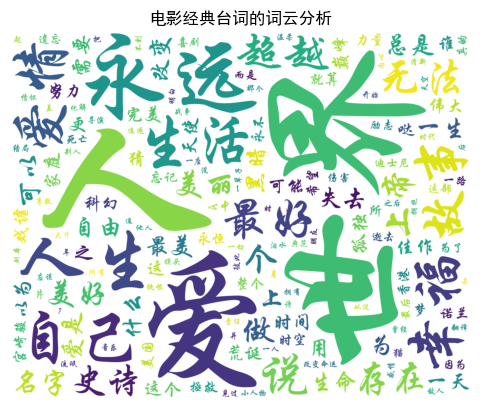

In [12]:
# 经典台词 词云
from  wordcloud import  WordCloud
import  matplotlib.pyplot as plt
import  jieba
import re
import collections
import  numpy as np
from imageio import imread

sql = 'select quote from movie'
quotes = execute_sql(sql, 1)
text = ""
for quote in quotes[0]:
    text += quote

words = ''.join(text)
# 去除标点符号
quotes = re.sub(r"[0-9\s+\.\!\/_,$%^*()?;；:-【】+\"\']+|[！，;:%……&*（）]+", " ", words)
# lcut分割单词
words = jieba.lcut(quotes)
# 去除语气词及无意义词
del_words = [' ','的', '是', '不是', '它', '她', '他','你','我', '我们', '能', '不能','就是','多','那些','这些', 
             '一个', '被','就', '让', '在', '都','每个',  '不会', '中', '没有','大','小','与',
             '比', '一部', '啦','像', '会', '得', '里','对', '当', '比','和','跟','一样','一场',
             '走','这样', '那么', '不要', '如果', '来', '却', '一种', '而', '电影','版','好','不',
             '不过', '只有','有','只能' ,'不得不','不过', '再','也', '最', '了', '才', '给', '要']

words_final = []
for word in words:
    if word not in del_words:
        words_final.append(word)

result = collections.Counter(words_final)

# jpg = imread('D:\桌面\大三下\企业实训\douban-crawler\屏幕截图 2023-02-23 104323.png')
cloud = WordCloud(
    # mask=jpg,
    font_path = 'STXINGKA.TTF',
    background_color = 'white',
    width = 1000,
    height = 800,
    margin=10,
    max_words = 150   
)
wordcloud = cloud.generate_from_frequencies(result)
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.title('电影经典台词的词云分析')
plt.show()


In [40]:
# 地区电影数 世界地图 / 热力图
from attachfile import name_map
from pyecharts.charts import Map
sql =  'select name, sum(count) count from (select (case 	when name not like "中国%" then name    else "中国"   end ) name, count(*) count from place left outer join movie_place on place.id = movie_place.place_id group by name) as tmp group by name'
place, count = execute_sql(sql, 2)
map = (
    Map(init_opts=opts.InitOpts(height="800px", width='1400px', renderer='svg'))  
    .add("电影地区分布", [list(z) for z in zip(place, count)], "world", is_map_symbol_show=False, name_map=name_map) 
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),
        tooltip_opts=opts.TooltipOpts(
            trigger="item", formatter="{b}: {c} 部"
        )
    )  
    .set_global_opts(
        title_opts=opts.TitleOpts(title="电影地区分布",subtitle='单位: 部'),  
        visualmap_opts=opts.VisualMapOpts(),  
    )   
)
map.render_notebook()

In [41]:
# 票房评分散点图
sql = 'select money, score from maoyan_movie;'

money, score = execute_sql(sql,2)

scatter = (
    Scatter(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
    .add_xaxis(score)
    .add_yaxis(y_axis=money,symbol_size=10,series_name="",label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(
            type_="value", splitline_opts=opts.SplitLineOpts(is_show=True)
        ),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
            name="万元"
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True),
        title_opts=opts.TitleOpts(title='票房与评分', subtitle='')
    )
)

scatter.render_notebook()

In [43]:
# 语言票房柱状图
sql = 'SELECT l.name as language, TRUNCATE(avg(mm.money),2) as piaofang, TRUNCATE(avg(mm.score),2) as score\
       FROM (maoyan_movie mm join maoyan_movie_lang mml on mm.id=mml.maoyan_id) join lang l on l.id=mml.lang_id\
       group by language;'
       
language,piaofang,score = execute_sql(sql,3)

# 绘制柱状图
bar = (
       Bar(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
        .add_xaxis(language)
        .add_yaxis('评分', score, category_gap="25%", yaxis_index=0,z=0,color='MediumTurquoise',label_opts=opts.LabelOpts(is_show=False))
        .extend_axis(yaxis=opts.AxisOpts(min_=0))
        .set_global_opts(
                xaxis_opts=opts.AxisOpts(
                        axislabel_opts=opts.LabelOpts(font_size=9, rotate=-30)
                ),
                yaxis_opts=opts.AxisOpts(name="分",min_= min(score) - 0.5),
                title_opts=opts.TitleOpts(title='各语言电影的平均评分与票房', subtitle=''),
                legend_opts=opts.LegendOpts(pos_left="70%")
        )
)
# 绘制线图
line = (
        Line(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
        .add_xaxis(language)
        .add_yaxis('票房',piaofang, label_opts=opts.LabelOpts(is_show=False), yaxis_index=1,
                symbol='circle',
                linestyle_opts=opts.LineStyleOpts(color="black", width=4, type_="solid"),
                itemstyle_opts=opts.ItemStyleOpts(
                        border_width=2, border_color="pink", color="pink"
                ),)
        .set_global_opts(
                xaxis_opts=opts.AxisOpts(
                        axislabel_opts=opts.LabelOpts(font_size=9, rotate=-30)
                ),
                yaxis_opts=opts.AxisOpts(name="万元"),
                legend_opts=opts.LegendOpts(pos_left="30%")
        )
)

bar.overlap(line)
bar.render_notebook()

In [44]:
# 不同月份上映的电影的总票房 饼图
sql = ' SELECT MONTH(date) as month, sum(money) as piaofang\
        FROM maoyan_movie\
        group by month\
        order by month;'
month, money = execute_sql(sql,2)
month = [str(i) for i in month]
# sum = 0
# for n in money:
#         sum+=n

pie = (
    Pie(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
    .add(
        series_name='月份',
        data_pair=[list(x) for x in zip(month, money)],
        center = ['50%', '50%'],
        label_opts=opts.LabelOpts(is_show=False, position="center"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="不同月份上映的电影的总票房",
            pos_right='center',
        ),
        legend_opts=opts.LegendOpts(pos_left="0%",pos_top="55",orient='vertical')
    )
    .set_series_opts(
        tooltip_opts=opts.TooltipOpts(
            trigger="item", formatter=" {b} 月的电影总票房: {c}万元"
        ),
        label_opts=opts.LabelOpts(formatter='{b}月'),
    )
)

pie.render_notebook()


In [45]:
# 各评分的评论比及评论数
sql = 'SELECT avg(comment/round(money/avg_money)/100)  rate , score ,avg(comment) avg_comment FROM douban.maoyan_movie group by score order by score desc limit 15'
rate, score, avg_comment = execute_sql(sql, 3)
rate.reverse()
score.reverse()
avg_comment.reverse()
rate  = [round(i) for i in rate]
score = [str(i) for i in score]
avg_comment  = [round(i) for i in avg_comment]
bar = (
        Bar(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
        .add_xaxis(score)
        .add_yaxis('评论比', rate)
        .set_global_opts(
                title_opts=opts.TitleOpts(title=' 各个评分评论比')
         )
)
line = (
        Line(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
        .add_xaxis(score)
        .add_yaxis('平均评论数', avg_comment)
        .set_global_opts(
                title_opts=opts.TitleOpts(title='各评分对应的平均评论数', pos_top='52%'),
                legend_opts=opts.LegendOpts(pos_top='52%')
        )
)
grid = (
        Grid(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
        .add(bar, opts.GridOpts(pos_bottom='55%'))
        .add(line, opts.GridOpts(pos_top='60%'))
)
grid.render_notebook()


In [46]:
# 各个演员的电影票房及均分
sql = 'select t.name name, count(*) count, truncate(avg(score), 2) avg_score  , truncate(sum(money),2) avg_m \
        from actor t left outer join maoyan_movie_actor mt on t.id = mt.actor_id join maoyan_movie m on m.id = mt.maoyan_id\
        group by t.name \
        order by avg_m desc limit 15'
name, count, avg_score , avg_m= execute_sql(sql, 4)
bar = (
        Bar(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
        .add_xaxis(name)
        .add_yaxis('票房', avg_m, category_gap="15%", yaxis_index=0,)
        # .add_yaxis('平均评分', avg_score)
        .extend_axis(yaxis=opts.AxisOpts(min_= min(avg_score) - 0.1))
        # .reversal_axis()
        .set_global_opts(
                xaxis_opts=opts.AxisOpts(
                        axislabel_opts=opts.LabelOpts(font_size=9, rotate=-30)
                ),
                
                title_opts=opts.TitleOpts(title='各演员的电影票房, 均分', subtitle=''),
                
                
        )
        
)
bar_add = (
        Bar(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
        .add_xaxis(name)
        .add_yaxis('均分', avg_score, yaxis_index=1)
)
bar.overlap(bar_add)
bar.render_notebook() 

In [47]:
# 不同年份平均票房 折线图
sql =  'select  avg(money) count , substr(date,1,4)  year \
        from type t left outer join maoyan_movie_type mt on t.id = mt.type_id join maoyan_movie m on m.id = mt.maoyan_id \
        group by  year \
        order by  year '
count , year = execute_sql(sql, 2)

decade = [str(x) + '年代' for x in year]
line = (
        Line(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
        .add_xaxis(year)
        .add_yaxis('平均票房', count)
        
        .set_global_opts(
                title_opts=opts.TitleOpts(title='不同年份的平均票房'),
                legend_opts=opts.LegendOpts()
        )
)
grid = (
        Grid(init_opts=opts.InitOpts(height="800px", width='1200px', renderer='svg'))
        .add(line, opts.GridOpts())
)
grid.render_notebook()
